# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [4]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

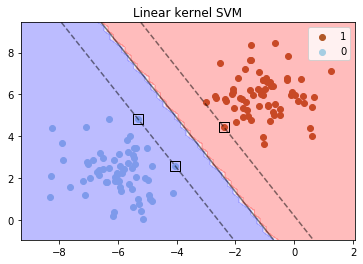

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()


Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

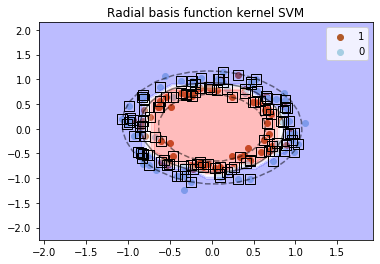

In [5]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.1, random_state=1234)


X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# build the model using a rbf kernel with gamma=0.5
model = svm.SVC(kernel='rbf',gamma=0.5, random_state=33,C=1)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Radial basis function kernel SVM')
plt.show()

<p><font color='#770a0a'>When should an RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

When a given dataset is not separable by a a linear line, the samples need to be manipulated in order to create a new dimension. By mapping the classes towards different 'heights', the possibility arises to fit a hyperplane between them. From this hyperplane, the optimal separation line between the classes can be calculated. 
Mapping the classes to a new dimension is done by using non-linear kernels, for example the RBF (Radial Basis Function) kernel. 
A kernel determines whether a sample point $x_i$ should be increased or decreased in comparison to another sample in that same training set, $x_j$. The RBF kernel, also called the Gaussian similarity function, compares the similarity between certain points by looking at the distance between $x_i$ and $x_j$. 
When the points lie near each other, the kernel will increase (or decrease depending on the kernel function), but when the distance between the points becomes large, the values of $x_i$ will not change. 
By doing this for all points, the points can be separated depending on the values of the feature vectors of $x_i$. Similar feature vectors will lie close to each other whereas different feature vectors will lie far away from each other and by using non linear kernels, these feature vectors will get different heights. 
So, when a dataset in not separable by a linear hyperplane, using an RBF kernel will make it possible to calculate a separation line between two classes. <br>

Before using the RBF kernel, it is important to normalize the data. When we look at the definition of the RBF function, we see that it makes use of the absolute distances between feature vectors. When we do not normalize the data, and one feature is significantly bigger than the others, the absolute difference between the feature vectors will be mostly determined by this large feature value. Therefore, in order to correctly compare feature vectors, the data has to be normalized. 

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

The classification report for the most optimal model is shown below
              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           0       0.97      0.94      0.95        33

    accuracy                           0.92        37
   macro avg       0.78      0.84      0.81        37
weighted avg       0.93      0.92      0.92        37

The binary precision of the model is 0.6
The macro precision of the model is 0.784375
The weighted precision of the model is 0.928885135135135
The binary recall of the model is 0.75


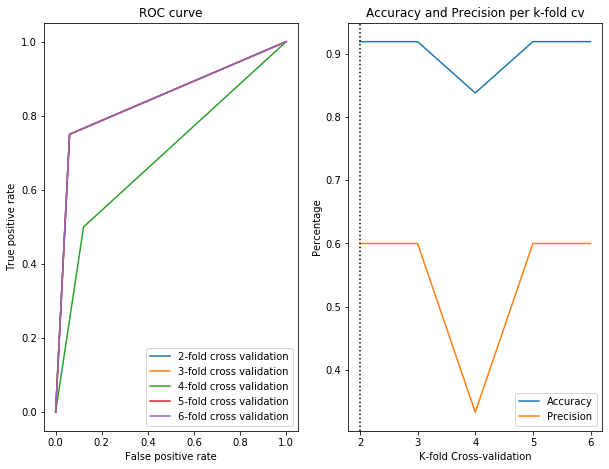

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import normalize, binarize
from sklearn.metrics import auc, roc_curve, accuracy_score, precision_score, recall_score

# Normalise data
normalized_gene_expression = normalize(gene_expression.values)

# Convert class to binary
label_values = np.ravel(binarize(drug_response.values, threshold=0.0))

# Split the dataset in X_train, y_train, X_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(normalized_gene_expression, label_values, random_state=1)

#Define the model
svc = svm.SVC()

C_range=np.logspace(-2, 10, 13)
gamma_range=np.logspace(-9, 3, 13)

#define the parameter grid
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range},
                    {'kernel': ['linear'], 'C': C_range}]

#Find the optimal hyper parameters using k-fold cross-validation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7.5))
K_fold=6
accuracy=np.zeros((1,K_fold-1))
precision=np.zeros((1,K_fold-1))
precision_list=precision.tolist()
for i in range(2,K_fold+1):
    grid = GridSearchCV(estimator=svc, param_grid=tuned_parameters, cv=i, scoring='neg_mean_squared_error', 
                             iid=False, return_train_score=False)
    #Train the model 
    grid.fit(X_train,y_train)
    #predict the labels of the X_test using the optimal hyper-parameters
    predict=grid.predict(X_test)
    accuracy[0,i-2]=accuracy_score(y_test, predict)
    precision[0,i-2]=precision_score(y_test, predict,average='binary')

    
    fpr, tpr, threshold = roc_curve(y_test, predict) 
    axes[0].plot(fpr, tpr,label='{}-fold cross validation'.format(i))
    axes[0].set_xlabel('False positive rate')
    axes[0].set_ylabel('True positive rate')
    axes[0].set_title('ROC curve')
    axes[0].legend()
    
max_precision= max(precision_list[0])
precision_list=precision.tolist()   
axes[1].plot(range(2,K_fold+1),accuracy[0,:],label='Accuracy')
axes[1].plot(range(2,K_fold+1),precision[0,:],label='Precision')
axes[1].axvline(precision_list[0].index(max(precision_list[0]))+2, ls=':', c='k')
axes[1].set_xlabel('K-fold Cross-validation')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Accuracy and Precision per k-fold cv')
axes[1].legend()

optimal_k=precision_list[0].index(max(precision_list[0]))+2
grid = GridSearchCV(estimator=svc, param_grid=tuned_parameters, cv=optimal_k, scoring='neg_mean_squared_error', 
                    iid=False, return_train_score=False)


grid.fit(X_train,y_train)
print('The classification report for the most optimal model is shown below')
print(classification_report(y_test,grid.predict(X_test), labels=[1,0]))

print('The binary precision of the model is {}'.format(precision_score(y_test, grid.predict(X_test),average='binary')))
print('The macro precision of the model is {}'.format(precision_score(y_test, grid.predict(X_test),average='macro')))
print('The weighted precision of the model is {}'.format(precision_score(y_test, grid.predict(X_test),average='weighted')))

print('The binary recall of the model is {}'.format(recall_score(y_test, grid.predict(X_test),average='binary')))

The script above determines the optimal SVM model using grids_search for different values for k in k-fold cross validation. 
The parameters that the gridsearch was given as an input, looked at two types of models, a linear or a linear basis
The model with the best accuracy was used to print a classification report and visualize the precision of the model. Next to the classification report, the precision for the model was calculated using the commands 'np.precision_score'. These precision values are the same as the values obtained from the classification report. 

## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

In [106]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import normalize, binarize
from sklearn.ensemble import RandomForestClassifier

# Convert class to binary
label_values = np.ravel(binarize(drug_response.values))

# Split the dataset in X_train, y_train, X_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(gene_expression.values, label_values, random_state=1)

# Define the model
rf = RandomForestClassifier(verbose=1, bootstrap=True, oob_score=True, n_jobs=-1 , random_state=1)

# Define parameters to search
param_dict = {
              'n_estimators': [10, 100, 250, 500, 1000],
              'max_depth': [10, 20, 30 , 40, 50, 100],
              'max_features': [5, 10, 20, 50, 100, gene_expression.shape[1]],
              'min_samples_leaf': [1, 2, 4, 5, 10],
              'min_samples_split': [2, 5, 10, 20],
              'criterion': ['entropy', 'gini']
              }

In [103]:
# Do the grid search (takes a while to run, therefore in if statement)
if False:
    grid = GridSearchCV(estimator=rf, param_grid=param_dict, cv=5, scoring='neg_mean_squared_error', 
                        iid=False, return_train_score=True, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    results = pd.DataFrame(grid.cv_results_)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

In [104]:
# Saving the results to .csv files
results.to_csv('./gridsearch-results/RandomForestClassifierGSCV.csv')
print("Best score = {}, Run #{}".format(grid.best_score_, grid.best_index_ + 1))
print("Best parameters:")
print(grid.best_params_)

Best score = -0.1805383022774327, Run #4116
Best parameters:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 238, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 10}


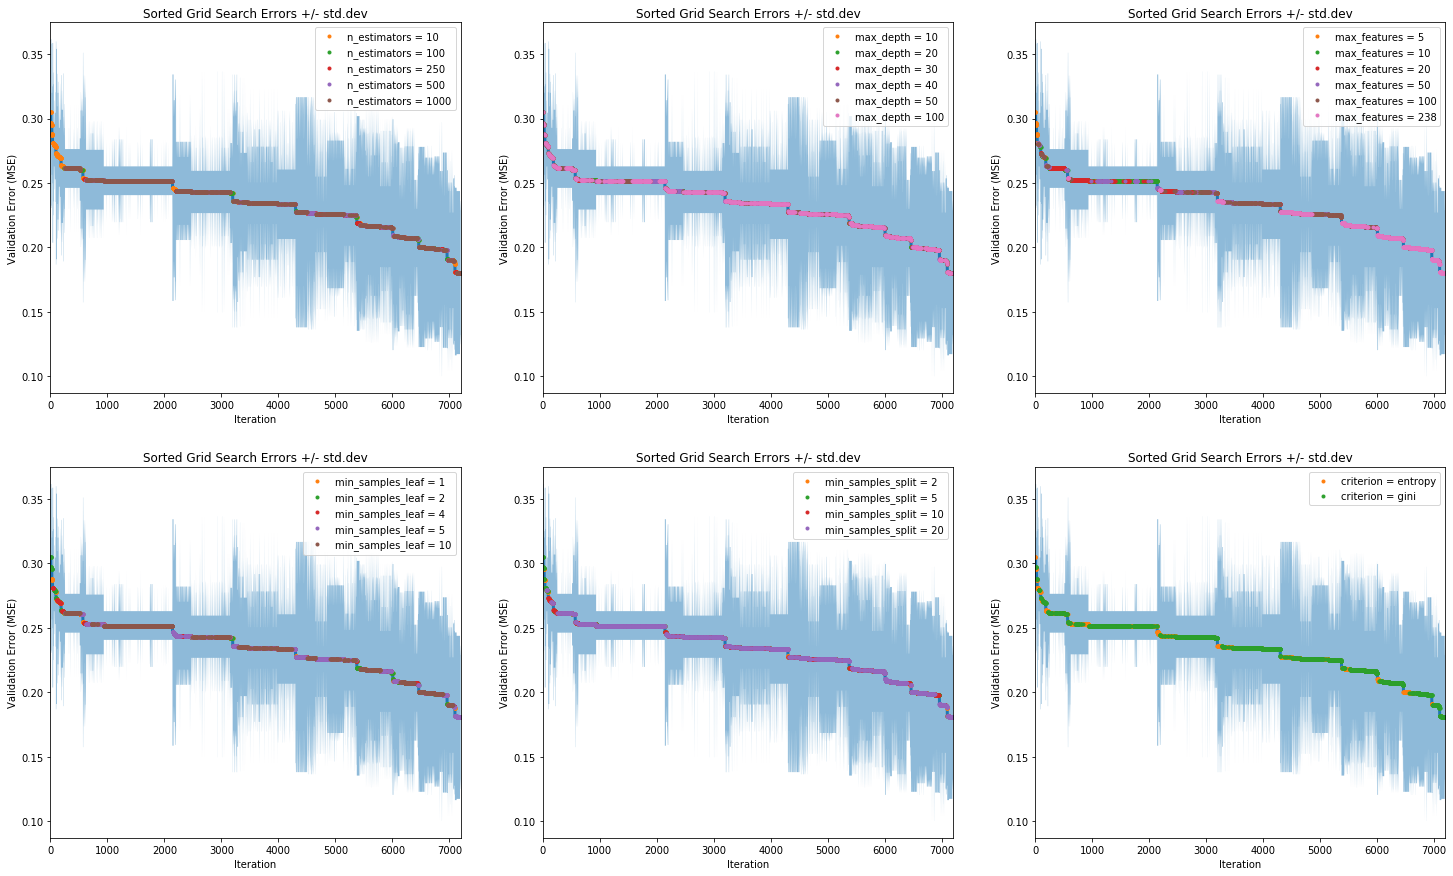

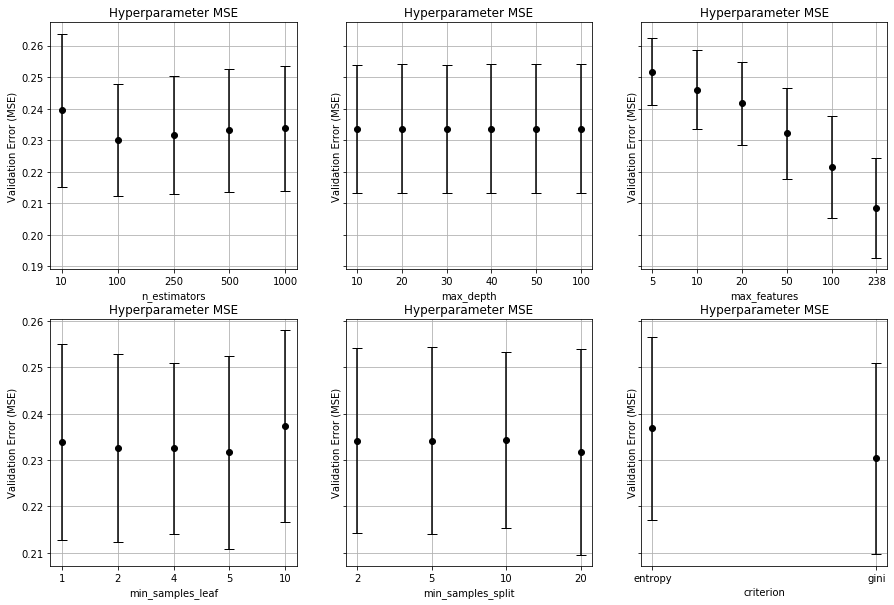

Best parameter set @MSE = 0.18:
----------------------------------------
n_estimators         = 1000      
max_depth            = 30        
max_features         = 238       
min_samples_leaf     = 1         
min_samples_split    = 20        
criterion            = gini      


Classification report best model
----------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92        33
         1.0       0.43      0.75      0.55         4

    accuracy                           0.86        37
   macro avg       0.70      0.81      0.73        37
weighted avg       0.91      0.86      0.88        37

The binary precision of the model is 0.42857142857142855
The macro precision of the model is 0.6976190476190476
The weighted precision of the model is 0.9084942084942085
The binary recall of the model is 0.75


In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Loading in results
results = pd.read_csv('./gridsearch-results/RandomForestClassifierGSCV.csv')
params = list(param_dict)

# Plotting Gridsearch Results
n_runs = results.shape[0]
sorted_results = results.sort_values(by=['mean_test_score'], inplace=False)
sorted_results = sorted_results.reset_index(drop=True)
mean_scores = -1*sorted_results['mean_test_score']
std_scores = sorted_results['std_test_score']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
axes = axes.flatten()
for i_p in range(len(params)):
    axes[i_p].plot(range(n_runs), -1*sorted_results['mean_test_score'], '-', linewidth=3)
    p = params[i_p]
    for nf in param_dict[p]:
        fline = mean_scores[sorted_results['param_'+p] == nf]
        axes[i_p].plot(fline.index, mean_scores.iloc[fline.index], '.', label=p+" = {}".format(nf))
    axes[i_p].legend()
    axes[i_p].fill_between(range(n_runs), mean_scores-std_scores, mean_scores+std_scores, alpha=0.5)
    axes[i_p].set_xlim([0, n_runs])
    axes[i_p].set_ylabel("Validation Error (MSE)")
    axes[i_p].set_xlabel("Iteration")
    axes[i_p].set_title("Sorted Grid Search Errors +/- std.dev")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey='row')
axes = axes.flatten()
i = 0
for p in params:
    for in_p in range(len(param_dict[p])):
        mean_pscores = mean_scores[sorted_results['param_'+p] == param_dict[p][in_p]]
        axes[i].errorbar(in_p, np.mean(mean_pscores), yerr=np.std(mean_pscores), fmt='ko', capsize=5)
        #axes[i].bar(in_p, np.mean(mean_pscores), yerr=np.std(mean_pscores), capsize=5, align='center', edgecolor='k')
    axes[i].set_xticks(range(len(param_dict[p])))
    axes[i].set_xticklabels(param_dict[p])
    axes[i].set_xlabel(p)
    axes[i].set_ylabel("Validation Error (MSE)")
    axes[i].grid()
    axes[i].set_title("Hyperparameter MSE")
    i += 1
plt.show()

# Print best hyperparameter set
print("Best parameter set @MSE = {:1.2f}:".format(mean_scores.iloc[-1]))
print(40*"-")
best_param_dict = {}
for p in params:
    pval = sorted_results['param_'+p].iloc[-1]
    best_param_dict[p] = pval
    print("{:20s} = {:10s}".format(p, str(pval)))
print("\n"+40*"="+"\n")
# Print classification report
print("Classification report best model")
print(40*"-")
best_rf = RandomForestClassifier(**best_param_dict)
best_rf.fit(X_train, y_train)
print(classification_report(y_test, best_rf.predict(X_test)))
print('The binary precision of the model is {}'.format(precision_score(y_test, best_rf.predict(X_test),average='binary')))
print('The macro precision of the model is {}'.format(precision_score(y_test, best_rf.predict(X_test),average='macro')))
print('The weighted precision of the model is {}'.format(precision_score(y_test, best_rf.predict(X_test),average='weighted')))
print('The binary recall of the model is {}'.format(recall_score(y_test, best_rf.predict(X_test),average='binary')))

From the classification report we can conclude that Random Forest performs slightly worse than SVC. 
The weighted precisions and F1 scores are all slightly worse for the Random Forest model. 
As for the number of features, quite a clear relation was seen where taking more features into account resulted in smaller errors,
which is to be expected. For the other hyperparameters no clear trends were seen in terms of validation error.
It was seen how the gini criterion performed slightly better. Also the number of estimators was optimal at 100.

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

"Fei-Hung Hung , Hung-Wen Chiu , Cancer Subtype Prediction from a
Pathway-level Perspective by Using a Support Vector Machine based on Integrated Gene Expression and Protein Network, Computer Methods and Programs in Biomedicine (2017), doi:
10.1016/j.cmpb.2017.01.006"

In this study SVM is applied to determine potential fragments of activated pathways around protein networks in different stages of disease. SVM generally works well for large number of features and a relatively small (training) data set. In this study 1586 features are used and 157 patients. In addition, SVM works nicely for sparse data, which is also the case in this study. 

